In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./datasets/cars.csv')

In [3]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(10)

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tata,Nano Genx,Xma,"Rs. 3,14,815",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Datsun,Redi-Go,D,"Rs. 2,79,650",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Datsun,Redi-Go,T,"Rs. 3,51,832",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Datsun,Redi-Go,A,"Rs. 3,33,419",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Datsun,Redi-Go,S,"Rs. 3,62,000",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1275,Mitsubishi,Montero,3.2 At,"Rs. 68,62,560",3200 cc,4.0,4.0,AWD (All Wheel Drive),In-line,BS IV,...,Yes,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


In [6]:
len(df)

1276

In [7]:
df.describe()

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
count,1210.000000,1174.000000,1272.000000,1270.000000,1141.000000,29.000000
mean,4.380992,3.977853,4.550314,5.270079,3.787029,1.793103
std,1.660957,0.833763,0.747816,1.145231,2.522399,0.773642
min,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,5.000000,2.000000,1.000000
50%,4.000000,4.000000,5.000000,5.000000,2.000000,2.000000
75%,4.000000,4.000000,5.000000,5.000000,6.000000,2.000000
max,16.000000,16.000000,5.000000,16.000000,14.000000,3.000000


In [8]:
df.isnull().sum()

Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Make to Electric_Range
dtypes: float64(6), object(134)
memory usage: 1.4+ MB


In [10]:
import matplotlib.pyplot as plt   # plot for data
import seaborn as sns   # plot for statistical parameters like mean, median, mode etc.

In [11]:
df['Make'].unique()

array(['Tata', 'Datsun', 'Renault', 'Maruti Suzuki', 'Hyundai', 'Premier',
       'Toyota', 'Nissan', 'Volkswagen', 'Ford', 'Mahindra', 'Fiat',
       'Honda', 'Jeep', 'Isuzu', 'Skoda', 'Audi', nan, 'Dc', 'Mini',
       'Volvo', 'Jaguar', 'Bmw', 'Land Rover', 'Porsche', 'Lexus',
       'Maserati', 'Lamborghini', 'Bentley', 'Ferrari', 'Aston Martin',
       'Bugatti', 'Bajaj', 'Icml', 'Force', 'Mg', 'Kia',
       'Land Rover Rover', 'Mitsubishi', 'Maruti Suzuki R'], dtype=object)

In [12]:
df['Cylinders'].unique()

array([ 2.,  3.,  4., nan,  5.,  6.,  8., 12., 10., 16.])

<Axes: xlabel='Make', ylabel='count'>

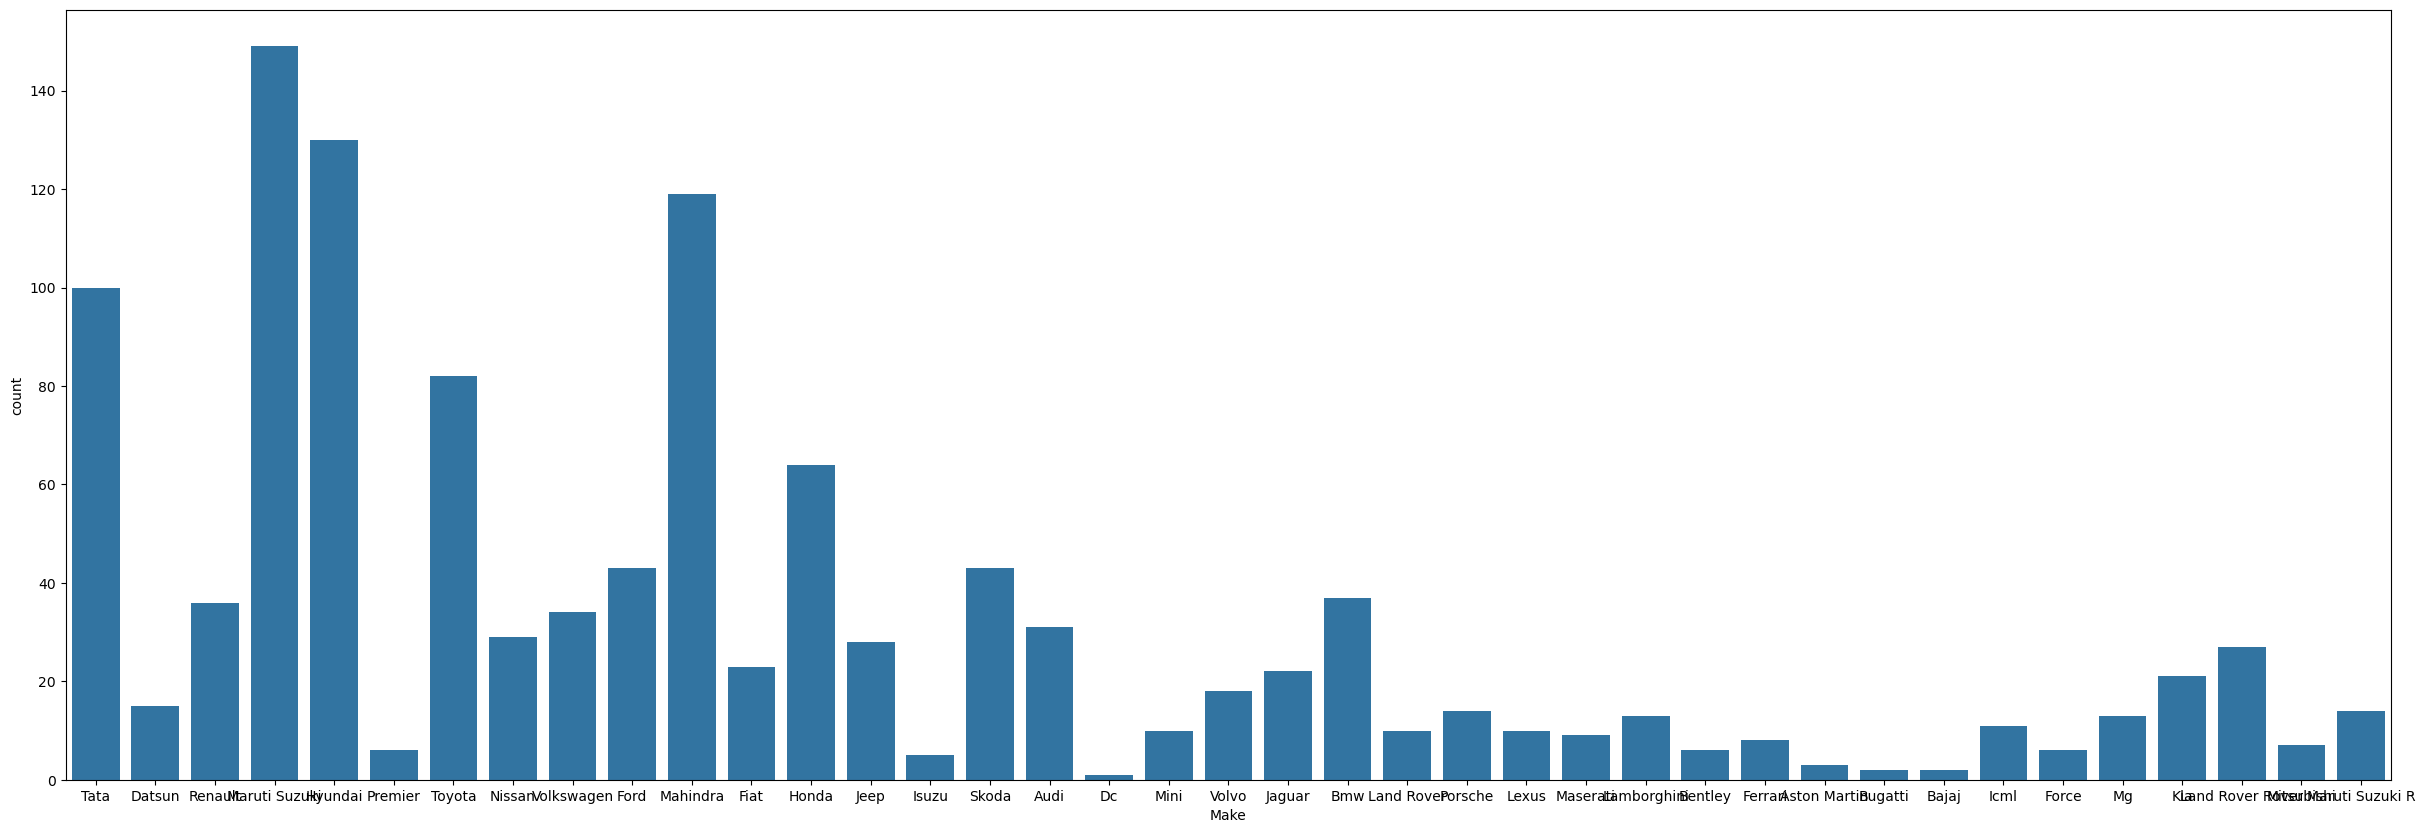

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(x = 'Make', data = df)

<Axes: xlabel='Cylinders', ylabel='count'>

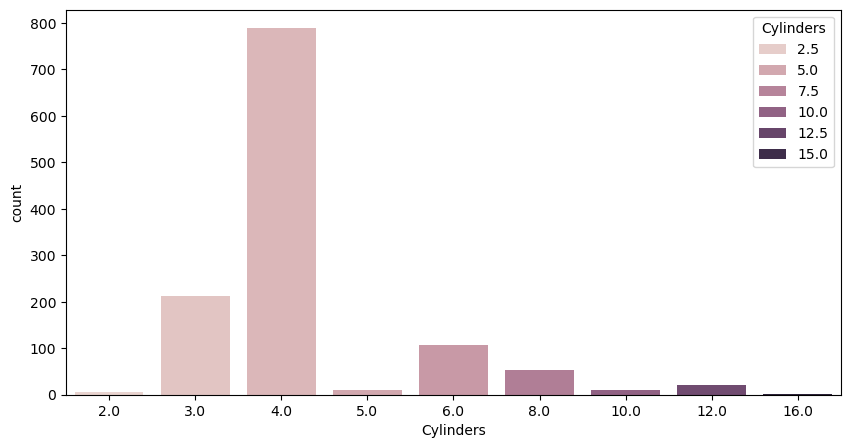

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Cylinders', hue = 'Cylinders', data = df)   # hue is used to color the bars based on the number of cylinders

Text(0.5, 1.0, 'Count of Cars by Make')

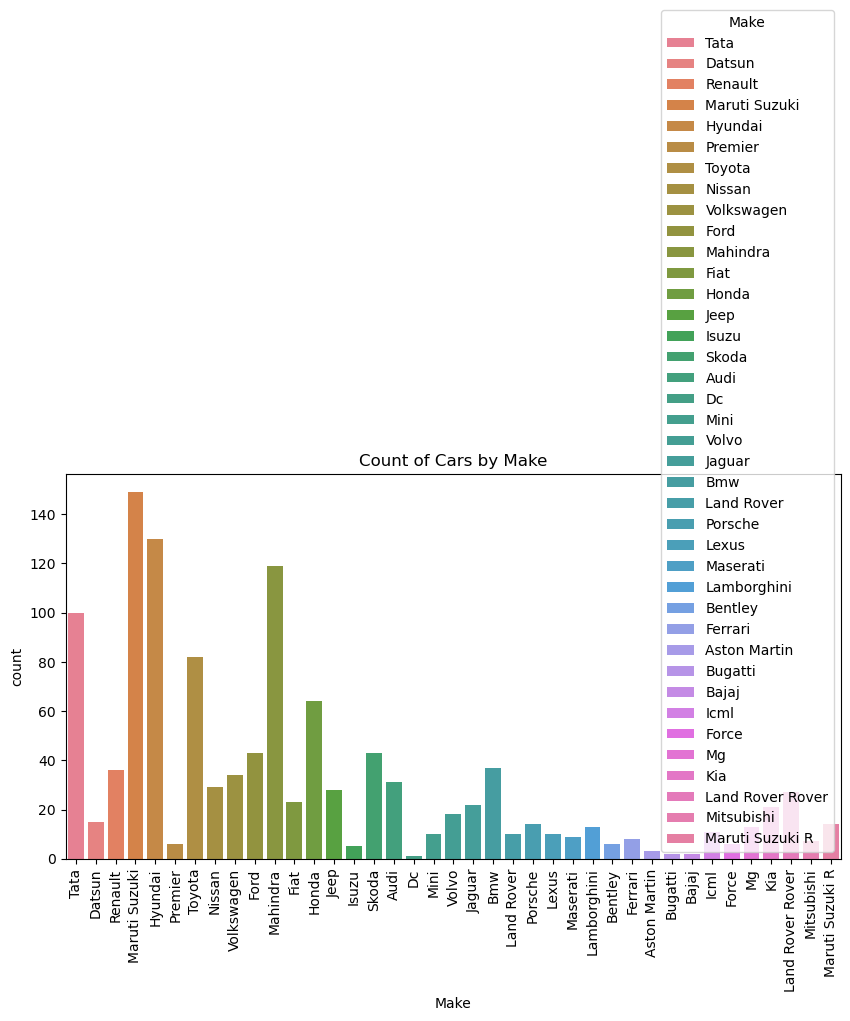

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Make', hue = 'Make', data = df)
plt.xticks(rotation=90)   # Rotate x-axis labels for better readability
plt.title('Count of Cars by Make')

<Axes: xlabel='Cylinder_Configuration', ylabel='count'>

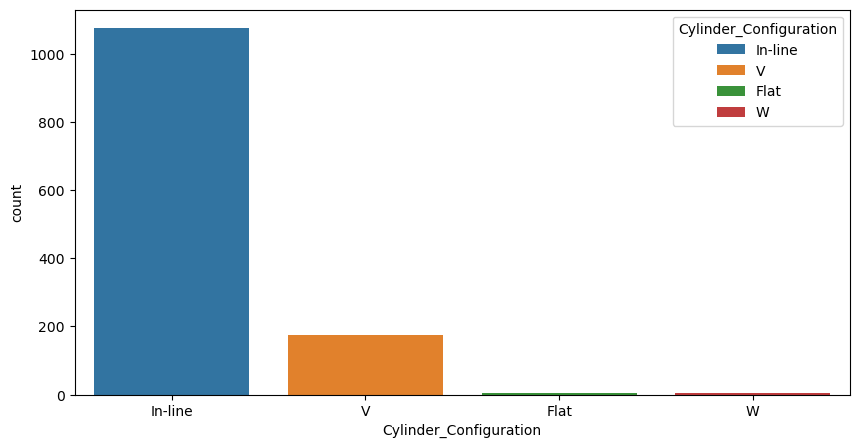

In [16]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Cylinder_Configuration', hue = 'Cylinder_Configuration', data = df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, 'Tata'),
  Text(1, 0, 'Datsun'),
  Text(2, 0, 'Renault'),
  Text(3, 0, 'Maruti Suzuki'),
  Text(4, 0, 'Hyundai'),
  Text(5, 0, 'Premier'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Nissan'),
  Text(8, 0, 'Volkswagen'),
  Text(9, 0, 'Ford'),
  Text(10, 0, 'Mahindra'),
  Text(11, 0, 'Fiat'),
  Text(12, 0, 'Honda'),
  Text(13, 0, 'Jeep'),
  Text(14, 0, 'Isuzu'),
  Text(15, 0, 'Skoda'),
  Text(16, 0, 'Audi'),
  Text(17, 0, 'Dc'),
  Text(18, 0, 'Mini'),
  Text(19, 0, 'Volvo'),
  Text(20, 0, 'Jaguar'),
  Text(21, 0, 'Bmw'),
  Text(22, 0, 'Land Rover'),
  Text(23, 0, 'Porsche'),
  Text(24, 0, 'Lexus'),
  Text(25, 0, 'Maserati'),
  Text(26, 0, 'Lamborghini'),
  Text(27, 0, 'Bentley'),
  Text(28, 0, 'Ferrari'),
  Text(29, 0, 'Aston Martin'),
  Text(30, 0, 'Bugatti'

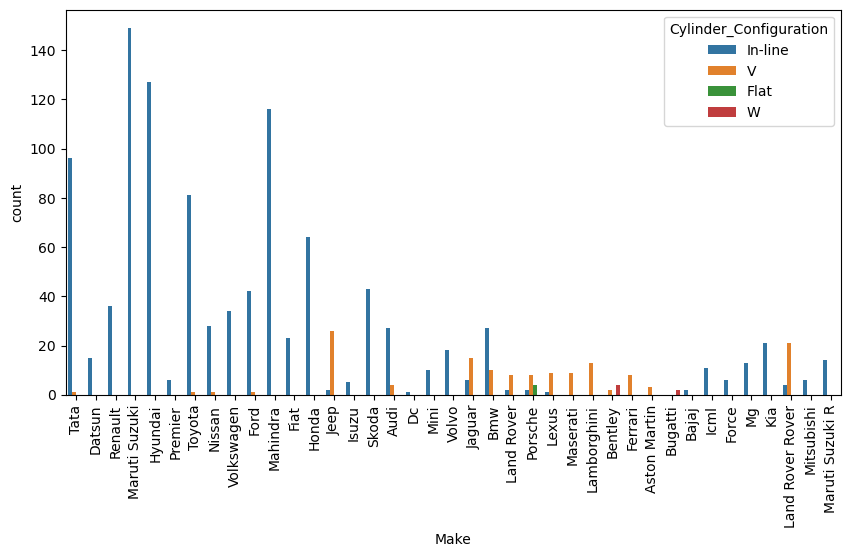

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x = 'Make', hue = 'Cylinder_Configuration', data = df)
plt.xticks(rotation = 90)

In [18]:
df['Cylinders'].sum()

5301.0

In [19]:
df['Cylinders'].mean()

4.38099173553719

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./datasets/data.csv')

In [22]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [23]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [24]:
len(df)

11914

In [25]:
df.shape

(11914, 16)

In [26]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [28]:
df.isnull()   # Check for null values in the DataFrame (True if there is null value, False otherwise)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11910,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
11912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df.isnull().sum()   # Count the number of null values in each column

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [30]:
df.isnull().sum()/len(df) * 100   # Calculate the percentage of null values in each column

Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.251805
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
Popularity            0.000000
MSRP                  0.000000
dtype: float64

In [31]:
df['Market Category'].unique()   # Get unique values in the 'Market Category' column

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [32]:
df['Market Category'].value_counts()   # Count the occurrences of each unique value in the 'Market Category' column

Market Category
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64

In [33]:
# replacing null values in 'Market Category' with highest frequency value
df['Market Category'].fillna('Crossover', inplace=True)

In [34]:
df['Market Category'].value_counts()

Market Category
Crossover                                          4852
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64

In [35]:
df['Market Category'].isnull().sum()   # Check if there are any null values left in the 'Market Category' column    

0

In [36]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [37]:
df['Engine HP']

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: Engine HP, Length: 11914, dtype: float64

In [38]:
df['Engine HP'].value_counts()

Engine HP
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
        ... 
660.0      1
661.0      1
573.0      1
592.0      1
154.0      1
Name: count, Length: 356, dtype: int64

In [39]:
df['Engine HP'].fillna(200.0, inplace=True)   # Replace null values in 'Engine HP' with 200

In [40]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [41]:
df.dropna(inplace=True)   # Drop rows with any null values

In [42]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [43]:
df.shape

(11875, 16)

In [44]:
df1 = df.drop(['Engine Fuel Type', 'Vehicle Style', 'Market Category', 'Popularity', 'Vehicle Size', 'Number of Doors'], axis=1)

In [45]:
df1.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [46]:
df1 = df1.rename(columns={'Make': 'Brand', 'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission'})

In [47]:
df1.head()

,Brand,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [48]:
df1 = df1.drop_duplicates()

In [49]:
df1.shape

(10886, 10)

<Axes: xlabel='Brand', ylabel='HP'>

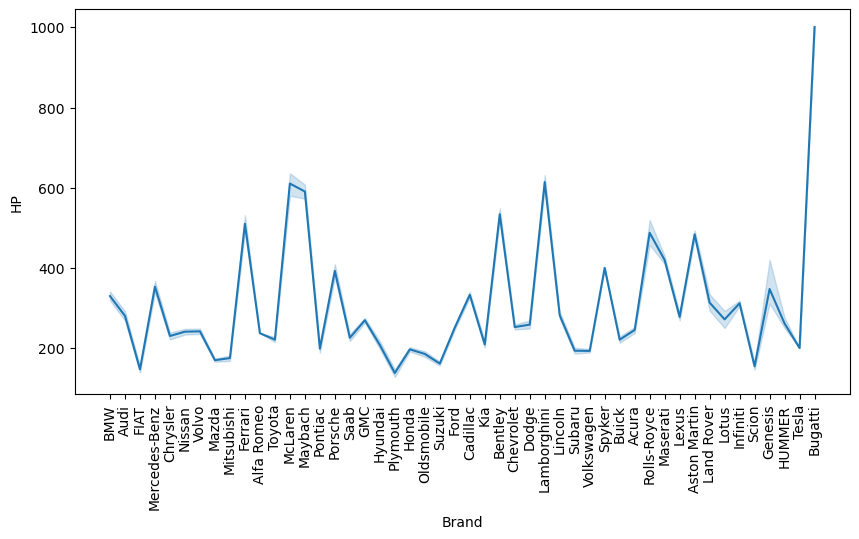

In [50]:
# Plotting the relationship between Brand and HP (Horsepower)

plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.lineplot(x = 'Brand', y = 'HP', data = df1)

<Axes: xlabel='Cylinders', ylabel='count'>

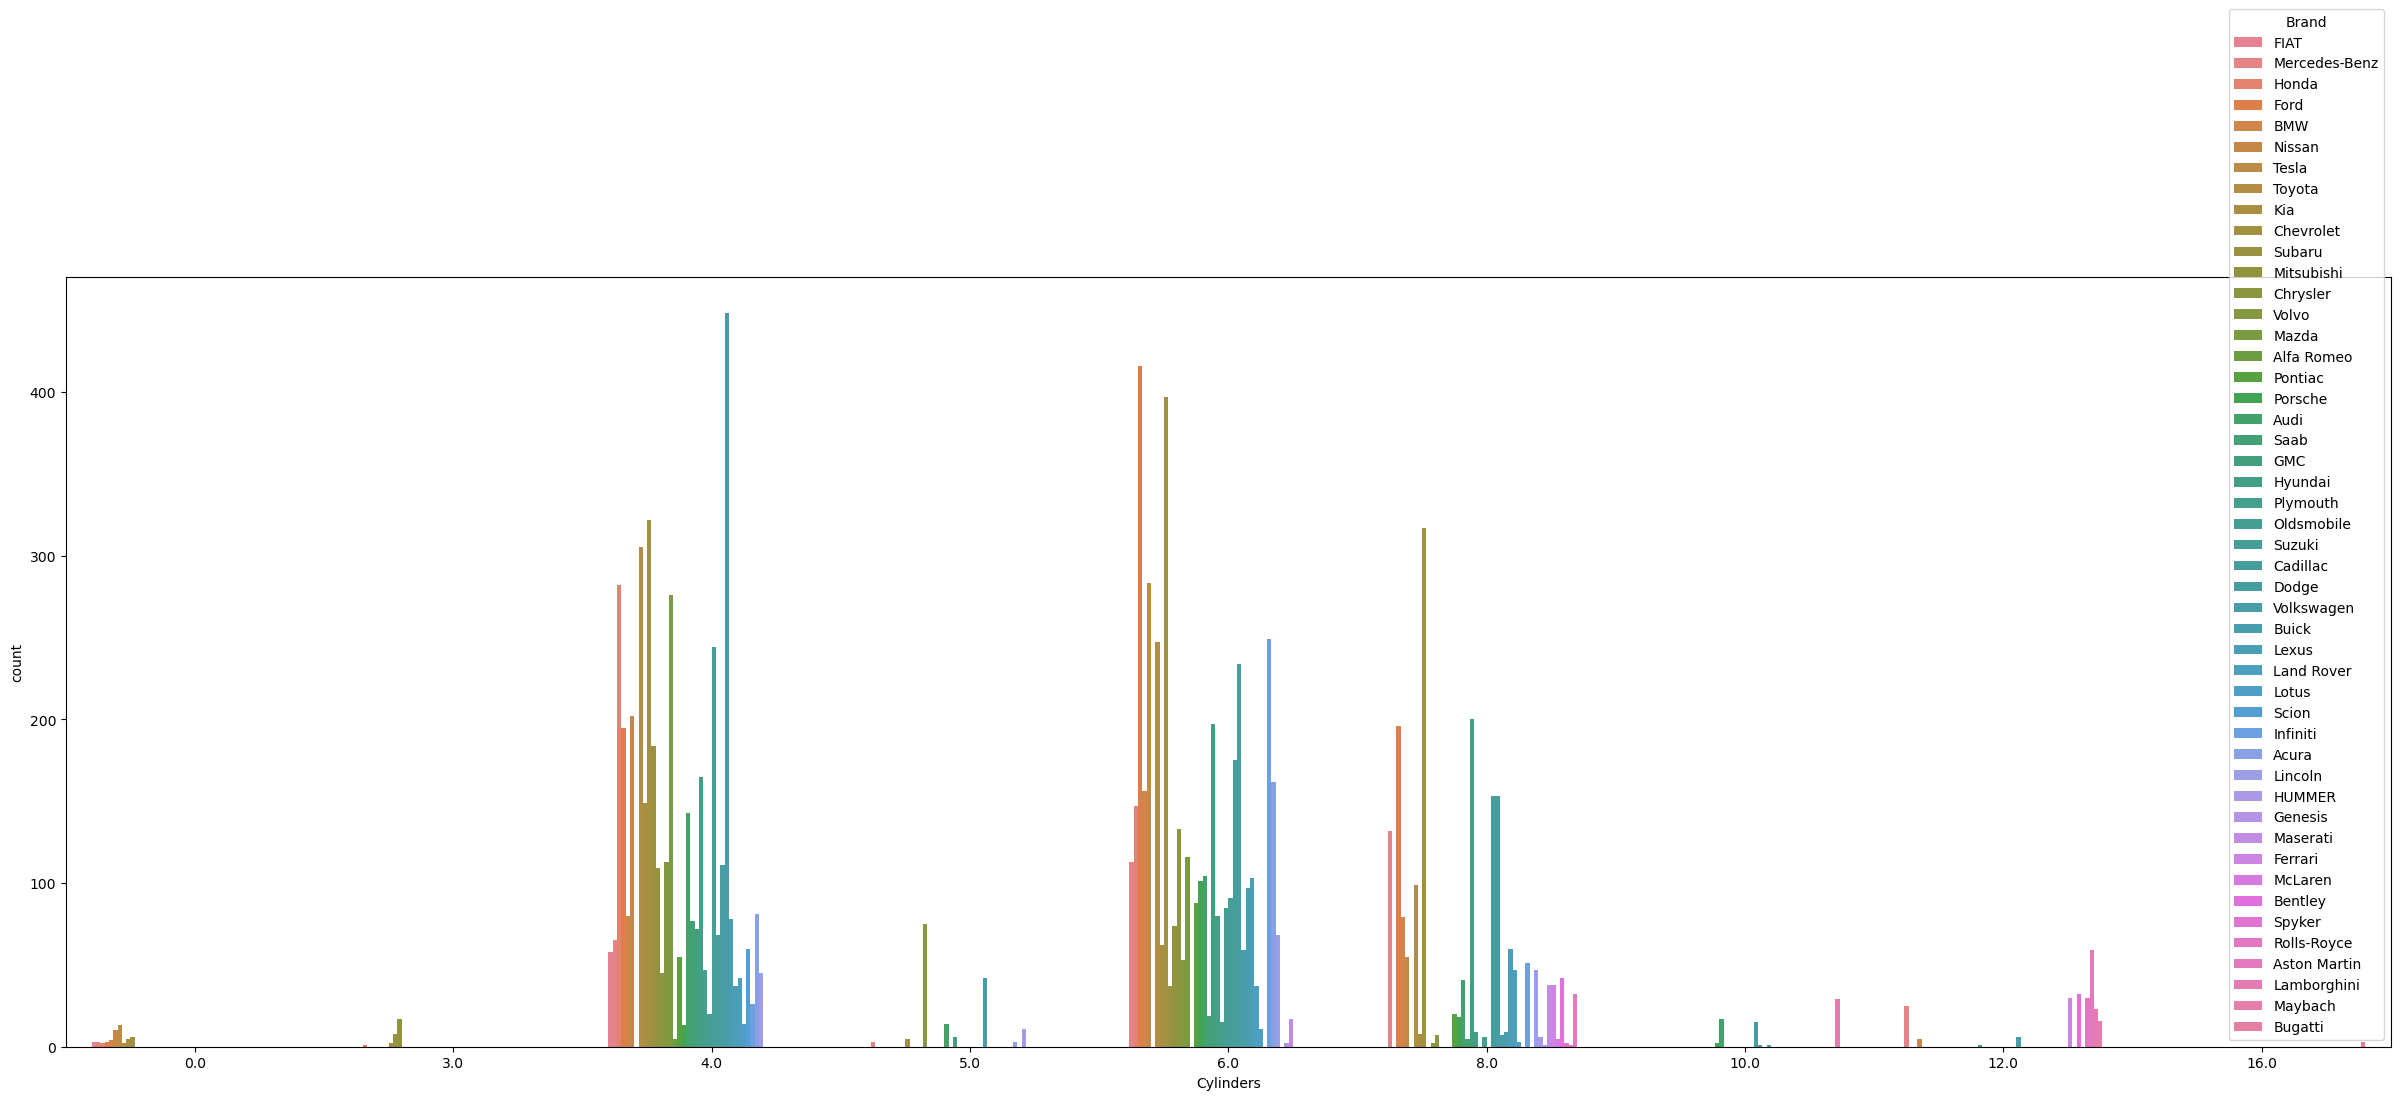

In [51]:
plt.figure(figsize=(30, 10))
sns.countplot(x = 'Cylinders', hue = 'Brand', data = df1)

<Axes: ylabel='MSRP'>

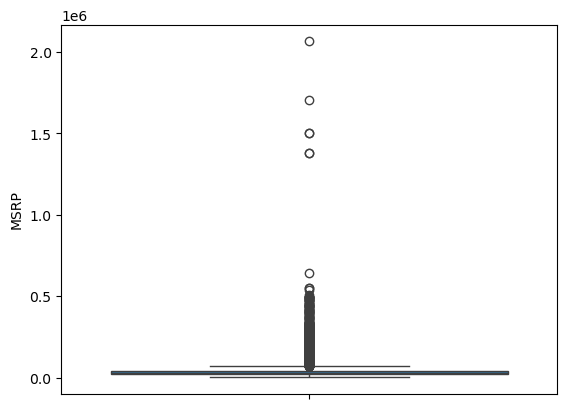

In [52]:
sns.boxplot(df['MSRP'])   # Checking the outliers in the 'MSRP' column

<Axes: ylabel='HP'>

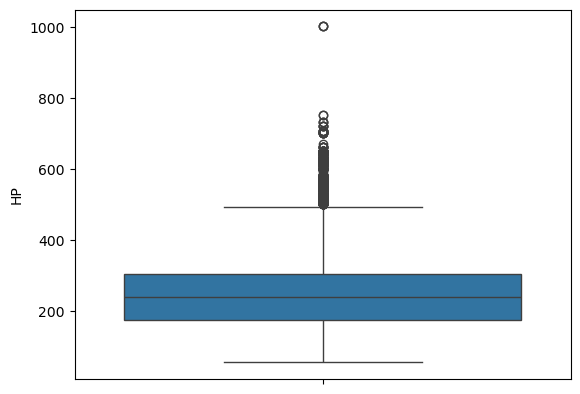

In [53]:
sns.boxplot(df1['HP'])

4.0 6.0 2.0
1.0 9.0


<Axes: ylabel='Cylinders'>

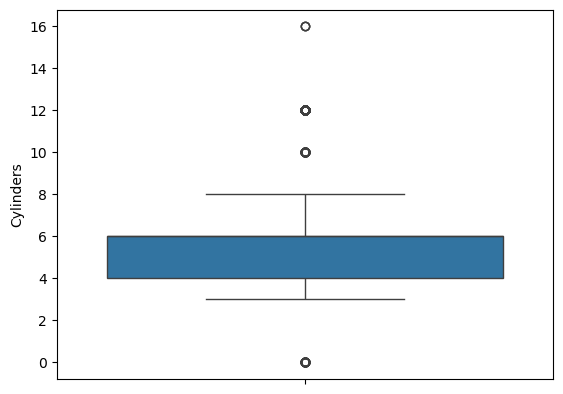

In [54]:
Q1 = df1['Cylinders'].quantile(0.25)
Q3 = df1['Cylinders'].quantile(0.75)    
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
print(Q1, Q3, IQR)   # Interquartile Range
print(LB, UB)   # Lower Bound and Upper Bound for outlier detection
sns.boxplot(df1['Cylinders'])

<Axes: xlabel='Brand'>

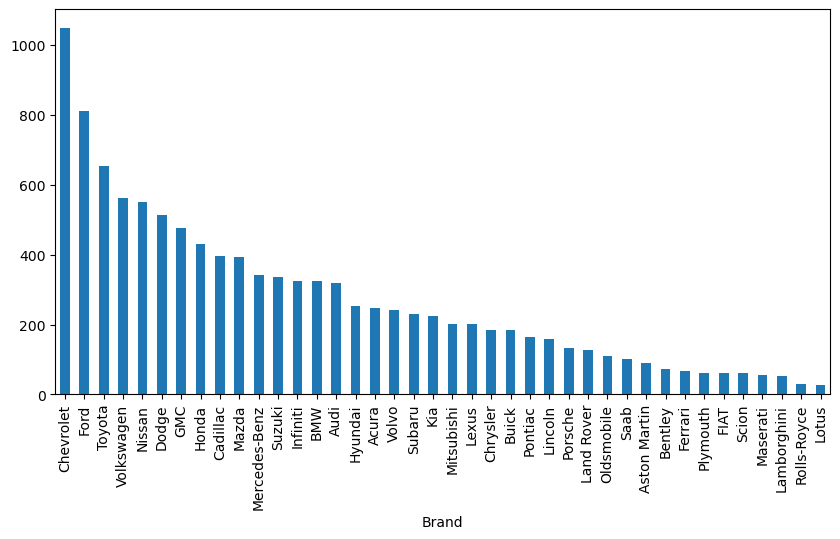

In [55]:
df1.Brand.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))

<Axes: xlabel='Transmission'>

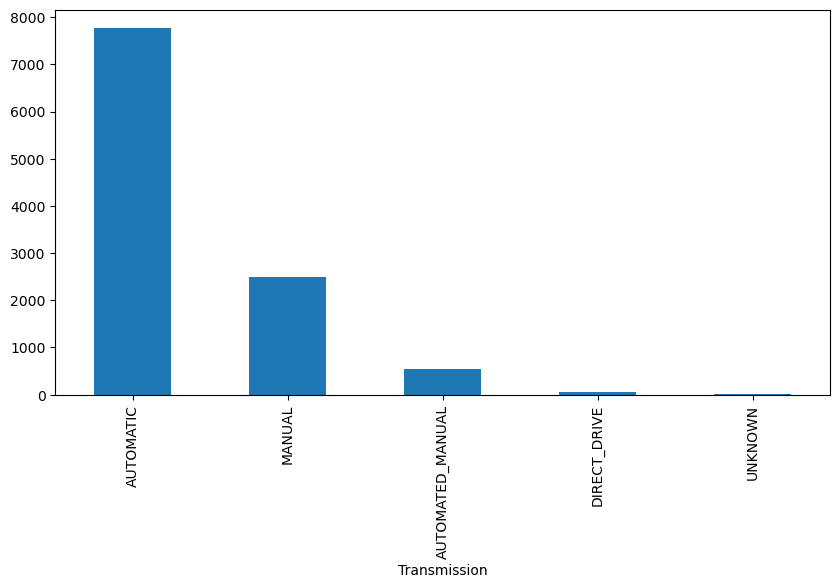

In [56]:
df1.Transmission.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))

In [57]:
df2 = df1[['Year', 'HP', 'Cylinders', 'highway MPG', 'city mpg', 'MSRP']]

<Axes: >

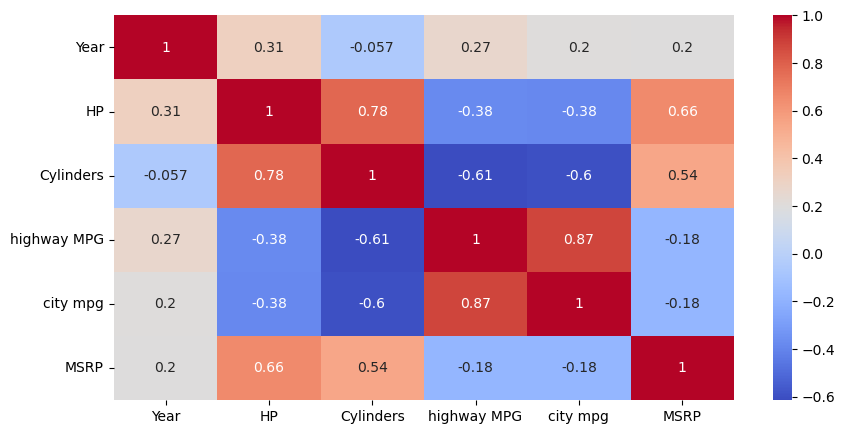

In [58]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')   # Display the correlation matrix with annotations and a color map

<Axes: >

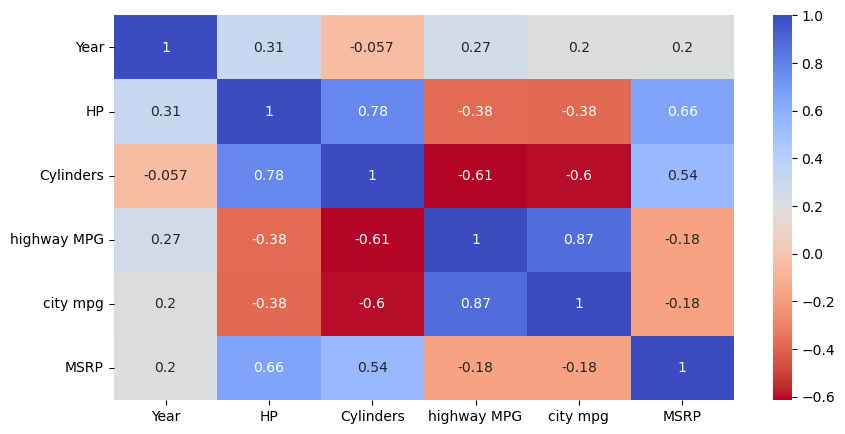

In [59]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm_r')   # Reverse the colormap for better visualization

<Axes: >

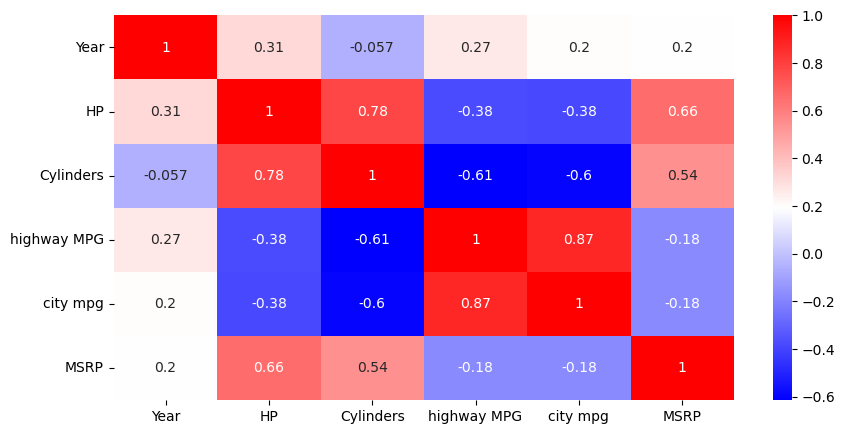

In [60]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2.corr(), annot=True, cmap='bwr')   # Use a blue, red and white colors only in colormap for the correlation matrix

<Axes: >

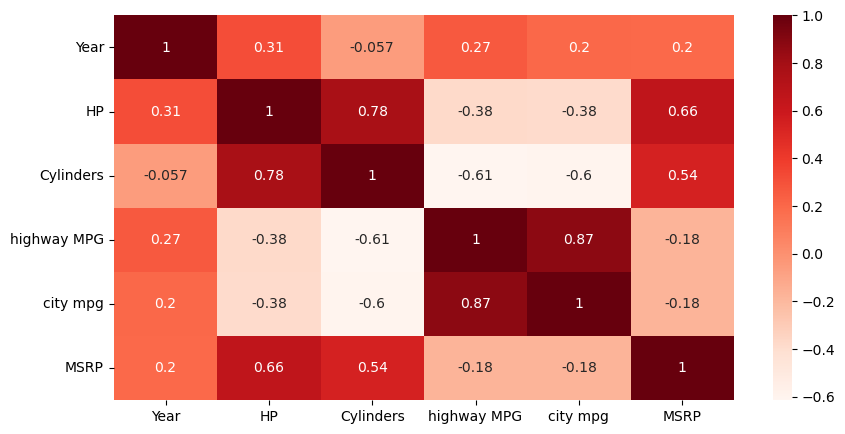

In [61]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2.corr(), annot=True, cmap='Reds')   # Use a red color only in colormap for the correlation matrix

<Axes: >

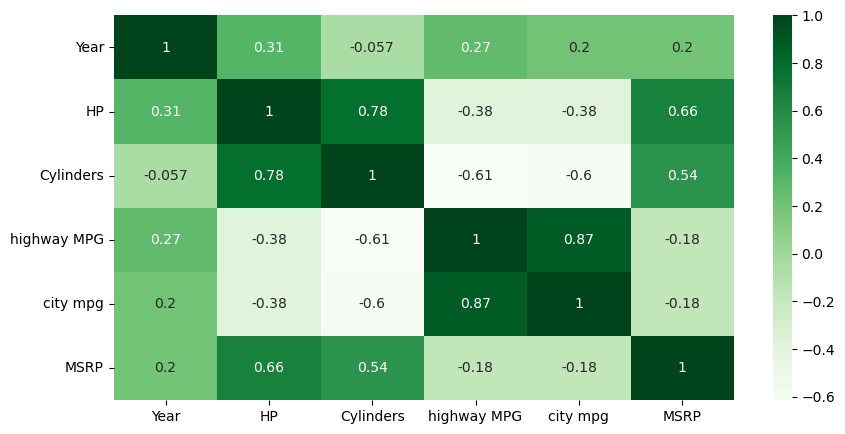

In [62]:
plt.figure(figsize=(10, 5))
sns.heatmap(df2.corr(), annot=True, cmap='Greens')   # Use a green color only in colormap for the correlation matrix

<Axes: xlabel='Year', ylabel='MSRP'>

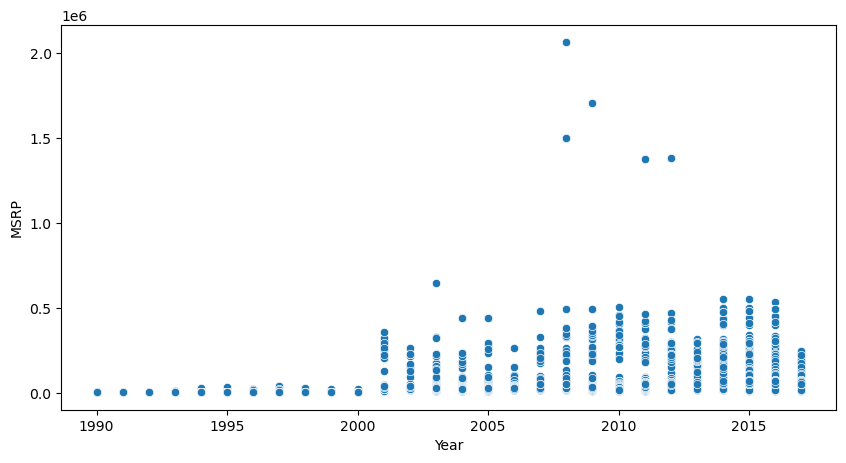

In [63]:
plt.figure(figsize=(10, 5))   # Using seaborn library to plot the scatter plot
sns.scatterplot(x='Year', y='MSRP', data=df1)

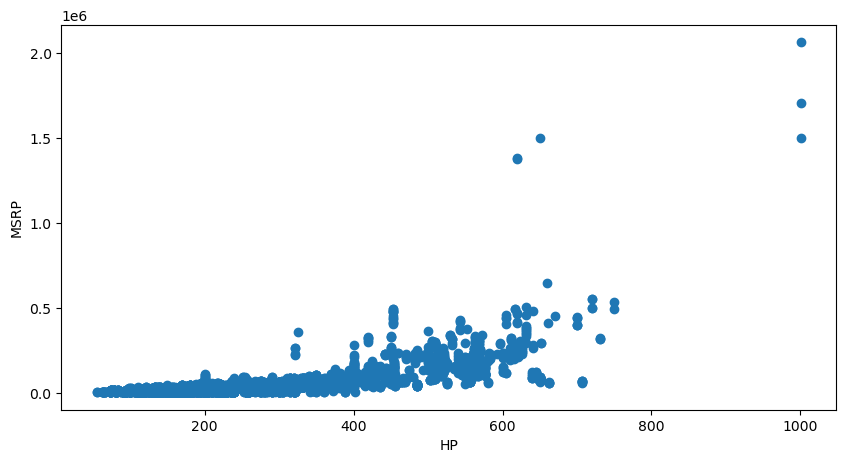

In [64]:
fig, ax = plt.subplots(figsize=(10, 5))   # Using mathplot library to plot the scatter plot
ax.scatter(df1['HP'], df1['MSRP'])
ax.set_xlabel('HP')
ax.set_ylabel('MSRP')
plt.show()

Plotting different types of plots using seaborn library

<Axes: xlabel='HP', ylabel='MSRP'>

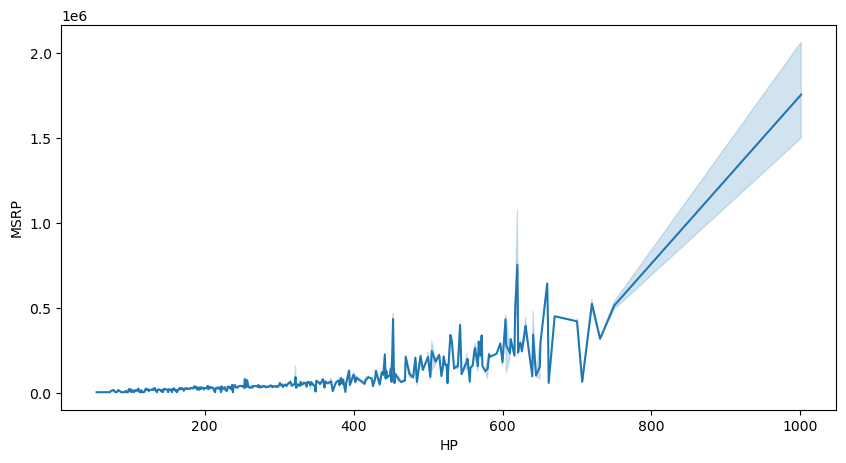

In [65]:
# Line plot

plt.figure(figsize=(10, 5))
sns.lineplot(x='HP', y='MSRP', data=df1)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'BMW'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'FIAT'),
  Text(3, 0, 'Mercedes-Benz'),
  Text(4, 0, 'Chrysler'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Volvo'),
  Text(7, 0, 'Mazda'),
  Text(8, 0, 'Mitsubishi'),
  Text(9, 0, 'Ferrari'),
  Text(10, 0, 'Alfa Romeo'),
  Text(11, 0, 'Toyota'),
  Text(12, 0, 'McLaren'),
  Text(13, 0, 'Maybach'),
  Text(14, 0, 'Pontiac'),
  Text(15, 0, 'Porsche'),
  Text(16, 0, 'Saab'),
  Text(17, 0, 'GMC'),
  Text(18, 0, 'Hyundai'),
  Text(19, 0, 'Plymouth'),
  Text(20, 0, 'Honda'),
  Text(21, 0, 'Oldsmobile'),
  Text(22, 0, 'Suzuki'),
  Text(23, 0, 'Ford'),
  Text(24, 0, 'Cadillac'),
  Text(25, 0, 'Kia'),
  Text(26, 0, 'Bentley'),
  Text(27, 0, 'Chevrolet'),
  Text(28, 0, 'D

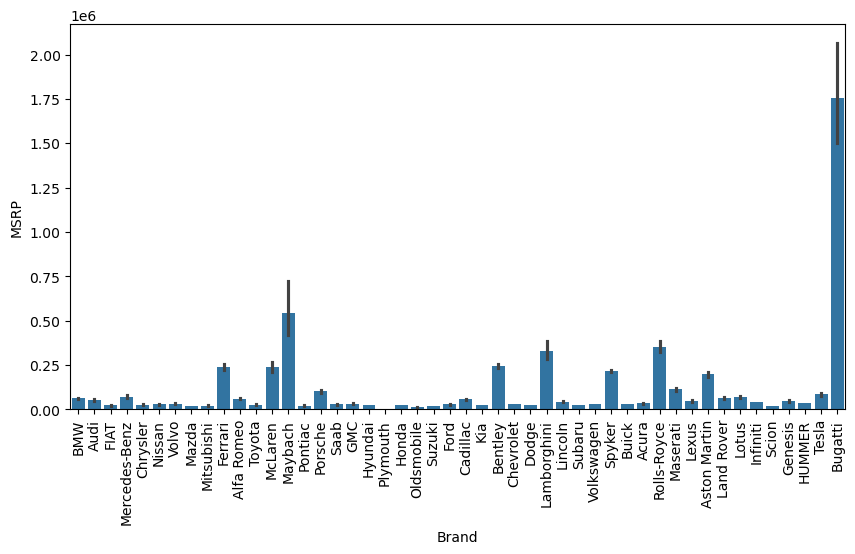

In [66]:
# Bar plot

plt.figure(figsize=(10, 5))
sns.barplot(x='Brand', y='MSRP', data=df1)
plt.xticks(rotation=90)

<Axes: xlabel='HP', ylabel='Count'>

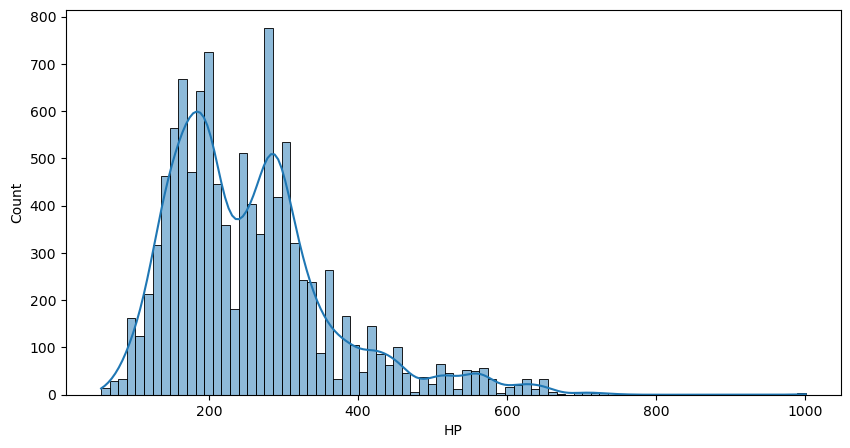

In [67]:
# Histogram

plt.figure(figsize=(10, 5))
sns.histplot(data = df1, x = 'HP', kde = True)   # kde=True adds a smooth curve to the histogram which represents the PDF(Probability Density Function) of the variable

<Axes: ylabel='count'>

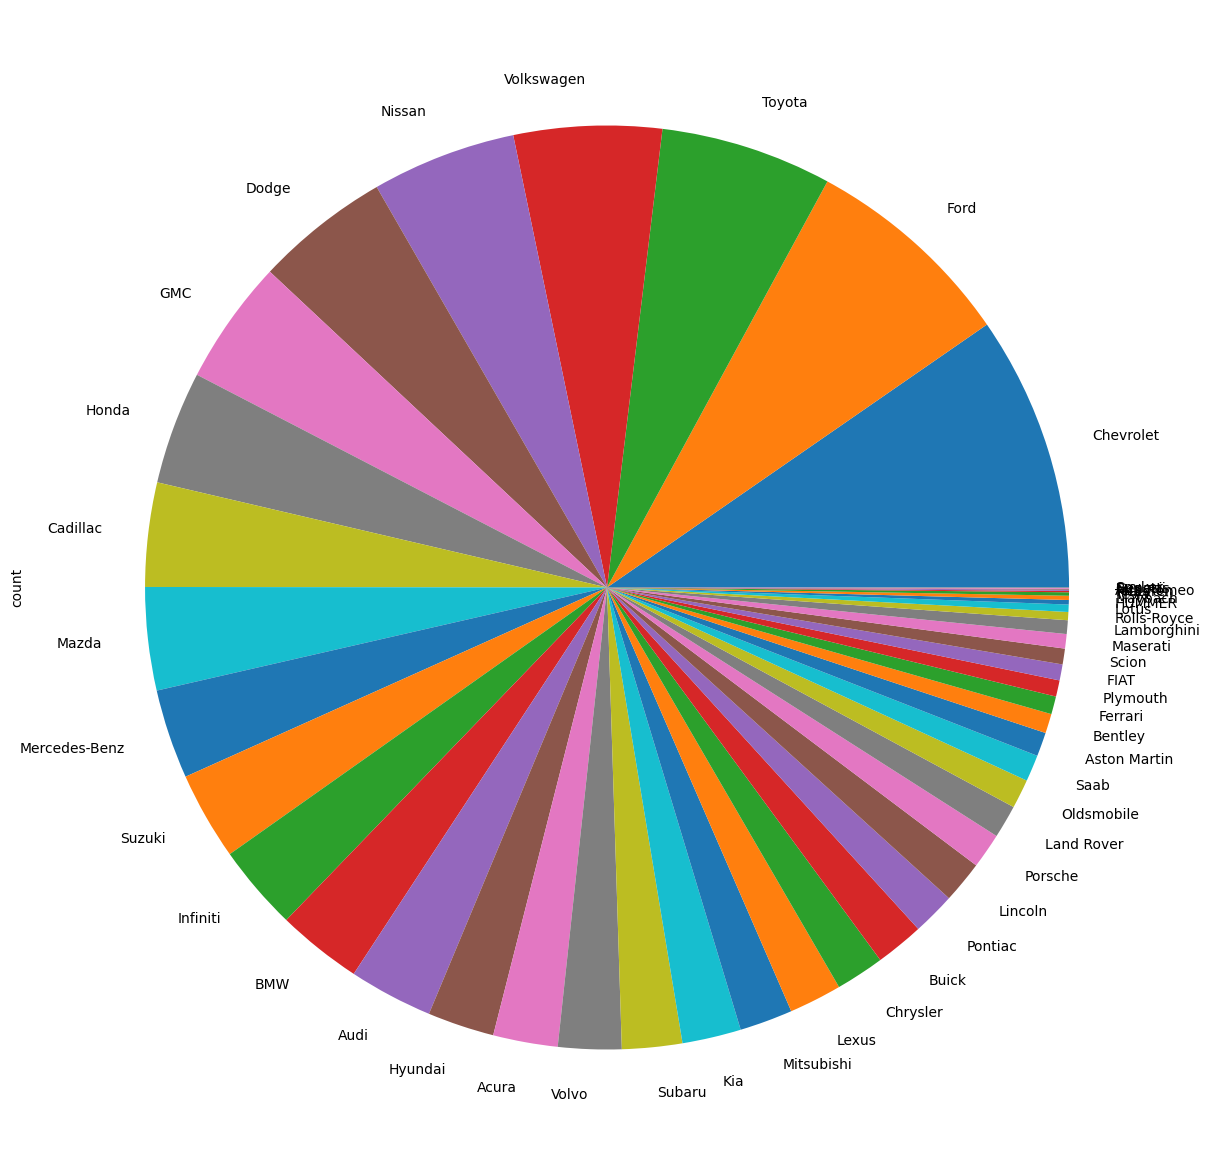

In [68]:
# Pie chart

plt.figure(figsize=(30, 15))
df1['Brand'].value_counts().plot.pie()

<Axes: xlabel='HP'>

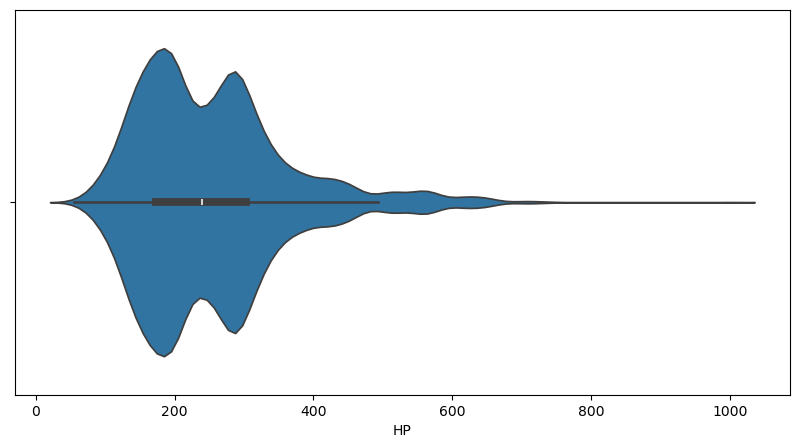

In [69]:
# Violin plot

plt.figure(figsize=(10, 5))
sns.violinplot(x='HP', data=df1)

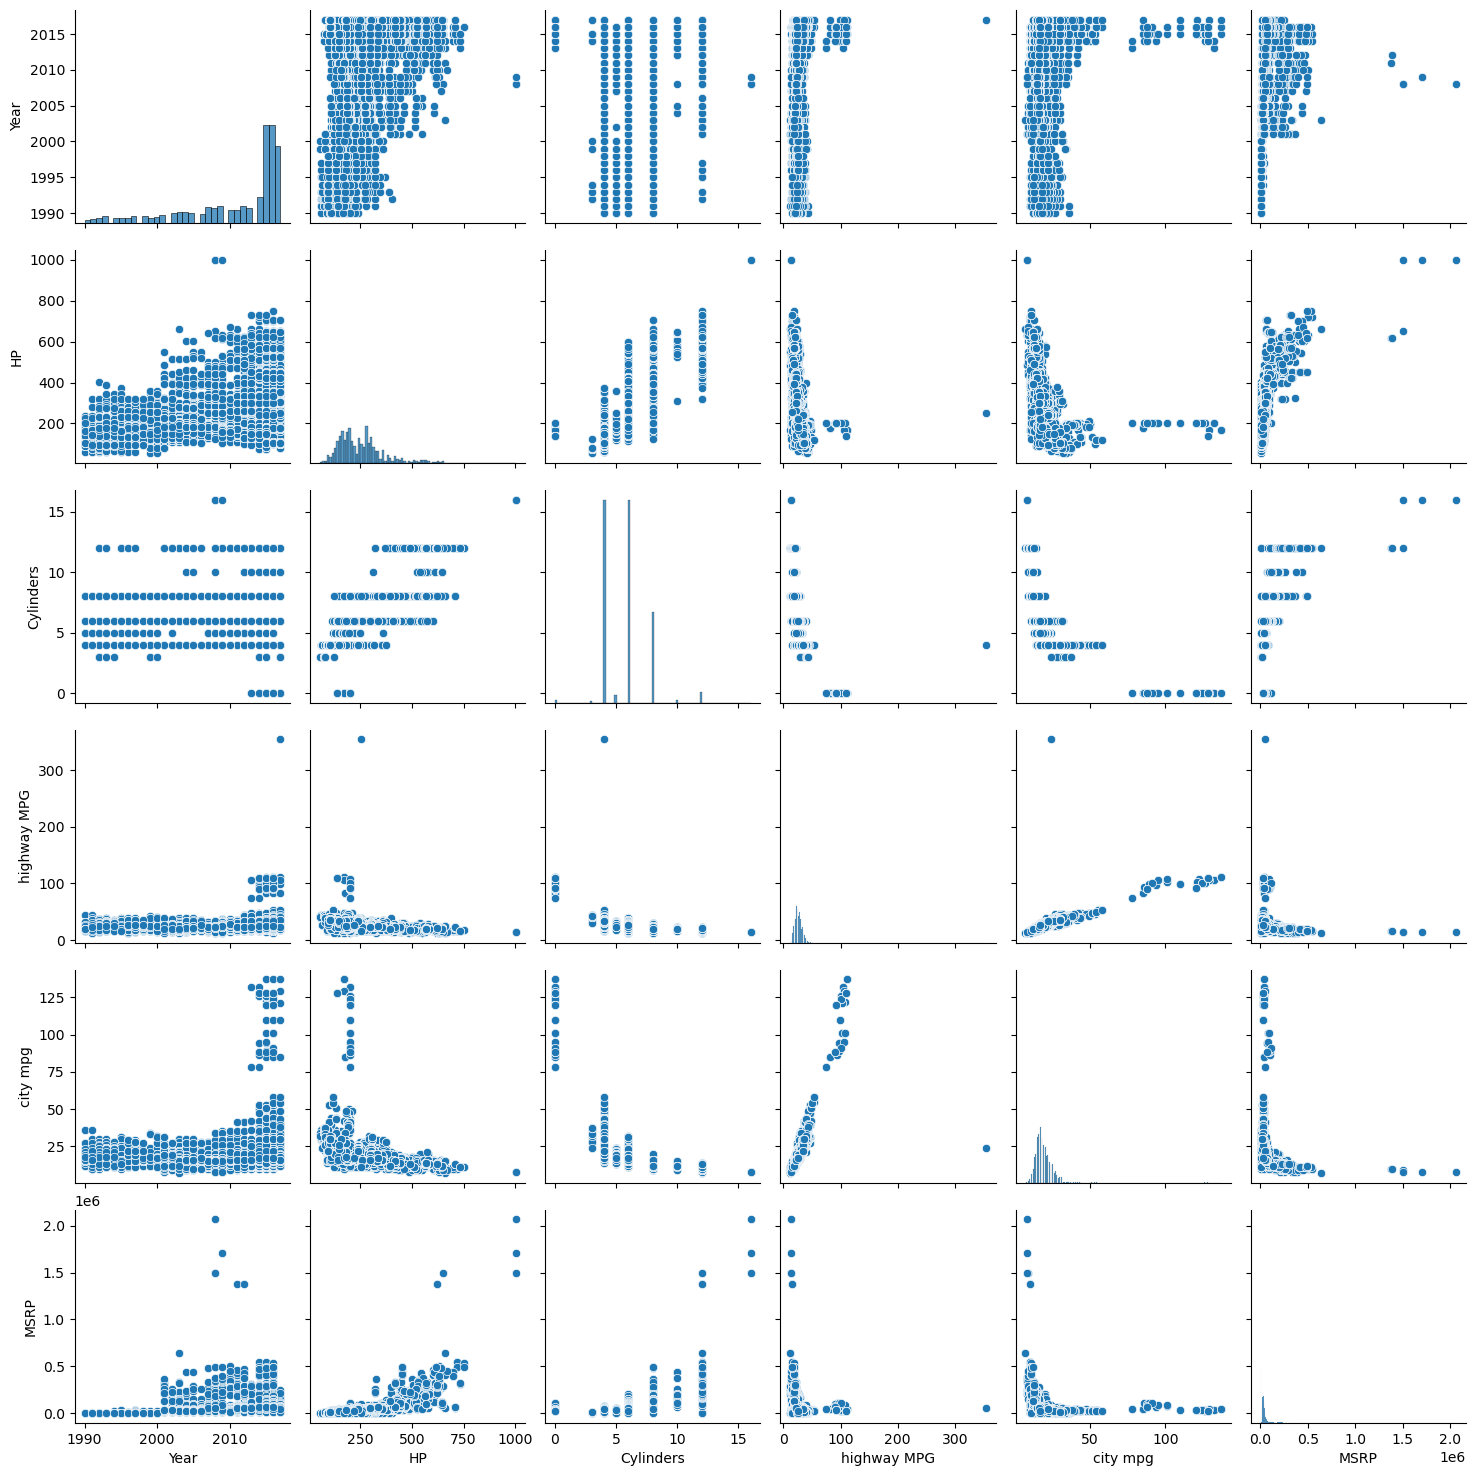

In [70]:
# Pairplot

sns.pairplot(df1)

<Axes: >

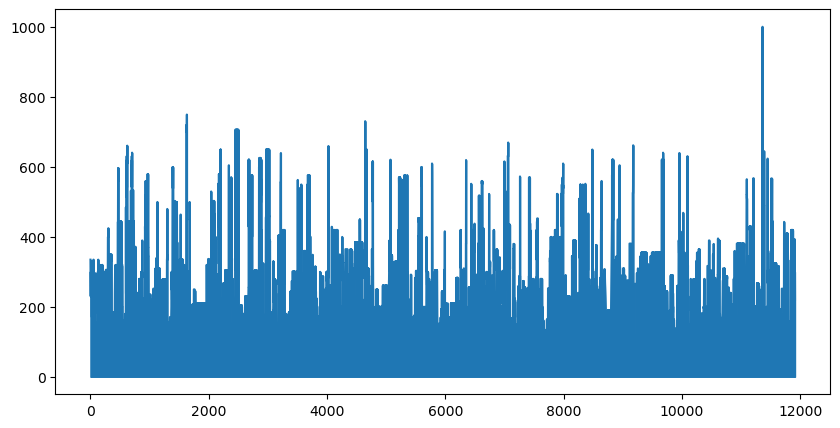

In [71]:
# Area plot

plt.figure(figsize=(10, 5))
df1['HP'].plot(kind = 'area')

Plotting 3D Graphs

In [72]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np

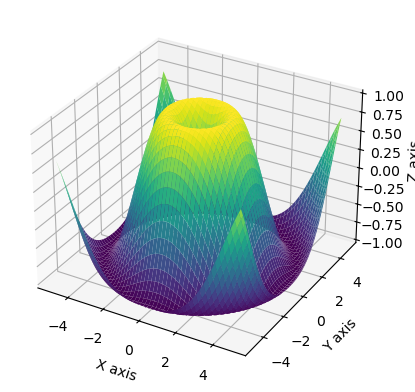

In [73]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

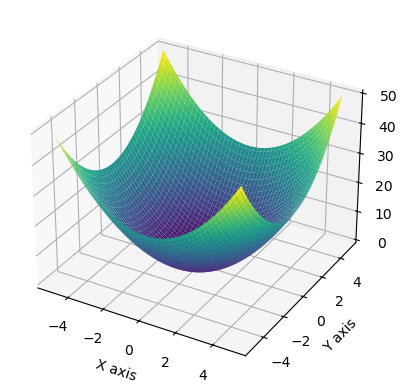

In [74]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

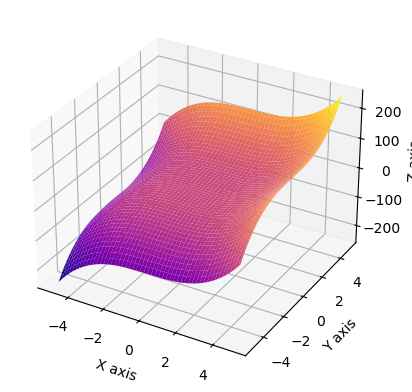

In [75]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**3 + Y**3
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

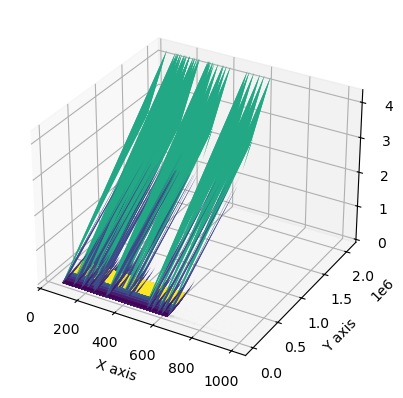

In [76]:
x = df1['HP']
y = df1['MSRP']
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

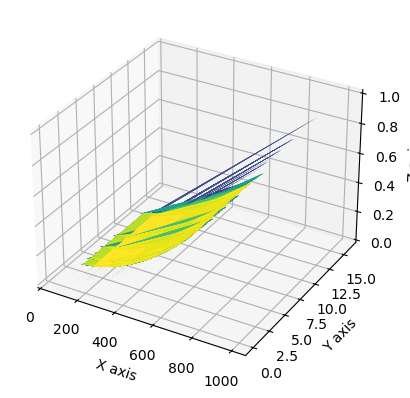

In [77]:
x = df1['HP']
y = df1['Cylinders']
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Donut Chart

<Figure size 1000x500 with 0 Axes>

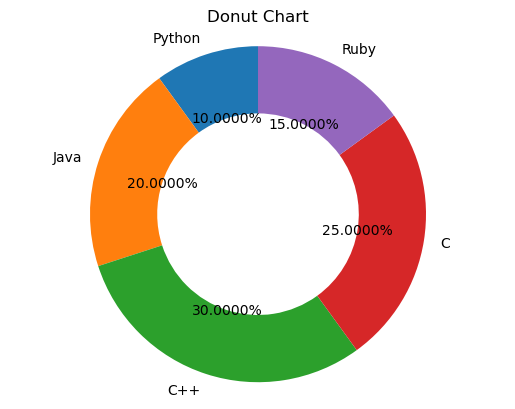

In [78]:
plt.figure(figsize=(10, 5))
labels = ['Python', 'Java', 'C++', 'C', 'Ruby']
sizes = [10, 20, 30, 25, 15]
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.4f%%', startangle = 90, wedgeprops = {'width': 0.4})   # wedprops is used to adjust the width of the donut chart
ax.axis('equal')   # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Donut Chart')
plt.show()

<Figure size 1000x500 with 0 Axes>

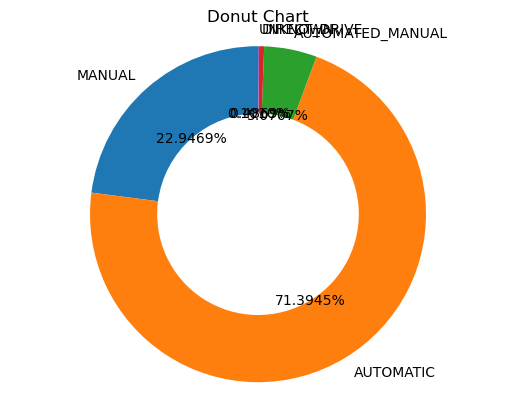

In [79]:
plt.figure(figsize=(10, 5))
labels = df1['Transmission'].unique()
sizes = []
for label in labels:
    sizes.append(((df1['Transmission'].value_counts()[label]) / len(df1)) * 100)
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.4f%%', startangle = 90, wedgeprops = {'width': 0.4})   # autopct is used to display the percentage of each slice
ax.axis('equal')
plt.title('Donut Chart')
plt.show()

<Figure size 1000x500 with 0 Axes>

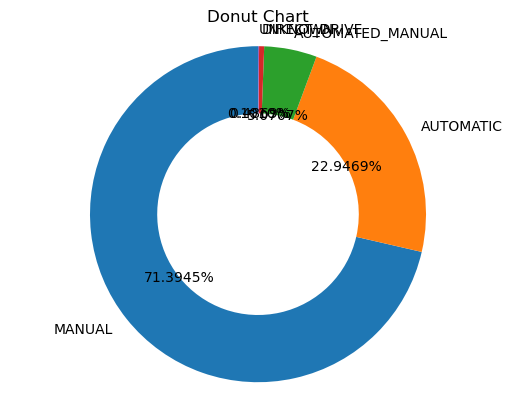

In [80]:
# We can use like this instead of the above loop to get the sizes directly

plt.figure(figsize=(10, 5))
labels = df1['Transmission'].unique()
sizes = df1['Transmission'].value_counts()/len(df1)*100
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels, autopct = '%1.4f%%', startangle = 90, wedgeprops = {'width': 0.4})   # autopct is used to display the percentage of each slice
ax.axis('equal')
plt.title('Donut Chart')
plt.show() 

Polar Graphs

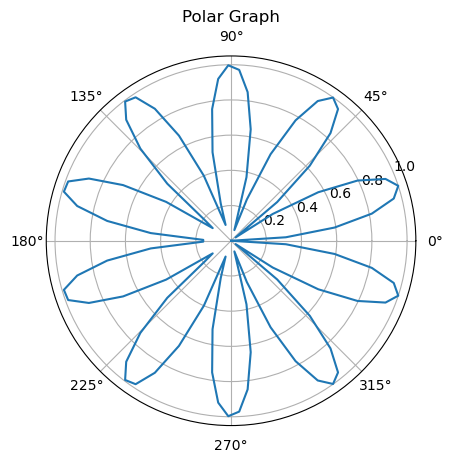

In [81]:
theta = np.linspace(0, 2*np.pi, 100)
r = np.abs(np.sin(5*theta))
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
plt.title('Polar Graph')
plt.show()

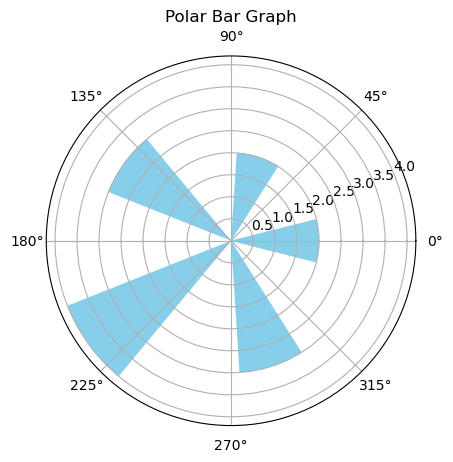

In [82]:
theta = np.linspace(0, 2 * np.pi, 6)
r = [1,2,3,4,3,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection = 'polar')
bars = ax.bar(theta, r, width = 0.5, color = 'skyblue')
plt.title('Polar Bar Graph')
plt.show()

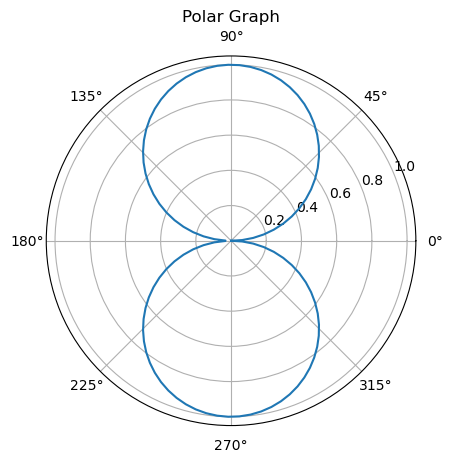

In [83]:
theta = np.linspace(0, 2*np.pi, 100)
r = np.abs(np.sin(theta))
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
plt.title('Polar Graph')
plt.show()